In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Baby Names Visual

From ["Measuring Statistical Dispersion with the Gini Coefficient"](http://kimberlyfessel.com/mathematics/applications/gini-use-cases/)

_Kimberly Fessel, PhD_ &nbsp; ||  &nbsp; _05 June 2020_  &nbsp;

Begin by loading the baby names from the US [Social Security Administration](https://www.ssa.gov/oact/babynames/limits.html) and filtering to 1950 through 2018.

In [2]:
names_dir = 'namesbystate/'
names_data_list = []
names_columns = ['state', 'gender', 'year', 'name', 'babies']

for file in os.listdir(names_dir):
    if file.endswith(".TXT"):
        names_data = pd.read_csv(names_dir + file, header=None, names=names_columns)
        names_data_list.append(names_data)
    else:
        continue

names_data = pd.concat(names_data_list)

In [3]:
data = names_data[names_data.year >= 1950]

In [4]:
data.head()

,state,gender,year,name,babies
17561,IN,F,1950,Linda,2262
17562,IN,F,1950,Mary,1517
17563,IN,F,1950,Patricia,1085
17564,IN,F,1950,Deborah,1084
17565,IN,F,1950,Susan,938


Higher proportion of male babies registered with Social Security Administration

In [5]:
data.groupby('gender').babies.sum() / data.babies.sum()

gender
F    0.470069
M    0.529931
Name: babies, dtype: float64

In [6]:
total_babies = data.babies.sum()
female_perc = data[data.gender=='F'].babies.sum() / total_babies
male_perc = data[data.gender=='M'].babies.sum() / total_babies

### Most Popular Names

Check most popular names by gender -- 18 out of top 20 names more commonly given to males.

In [7]:
most_popular_names = (
    data
    .groupby(['name', 'gender'])
    .babies
    .sum()
    .reset_index()
    .sort_values('babies', ascending=False)
)

In [8]:
most_popular_names[:20]   

,name,gender,babies
20839,Michael,M,3888725
7201,David,M,2874196
12793,James,M,2863869
14233,John,M,2729816
24549,Robert,M,2569730
30104,William,M,2102417
5929,Christopher,M,2004215
14474,Joseph,M,1688940
6899,Daniel,M,1674697
20297,Matthew,M,1567222


### Unique Names by Gender

Calculate and plot number of unique names per gender over time.

In [9]:
unique_names_per_gender = (
    data
    .groupby(['year', 'gender'])
    .name
    .nunique()
    .unstack()
)

In [10]:
unique_names_per_gender.head()

gender,F,M
year,,
1950,2113,1721
1951,2173,1735
1952,2209,1764
1953,2269,1756
1954,2299,1753


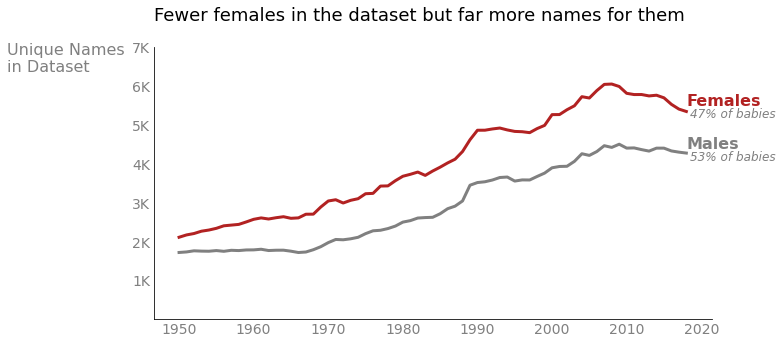

In [11]:
unique_names_per_gender.plot(figsize=(10, 5), linewidth=3,
                             color=['firebrick', 'gray']
                            )

# Axes labels
plt.xlabel('')
plt.ylabel("Unique Names\nin Dataset",
           rotation=0,
           position=(-.1, .9),
           fontsize=16,
           ha='left',
           labelpad=125,
           color='gray'
          )

# Remove box
sns.despine()

# Set y-limits and remove legend
plt.ylim(0, None)
plt.legend([], frameon=False)

# Title
plt.title("Fewer females in the dataset but far more names for them\n",
          fontsize=18, loc='left'
         )

# Annotations
plt.text(2018, 5500, "Females", color='firebrick', fontsize=16, fontweight='bold')
plt.text(2018, 4400, "Males", color='gray', fontsize=16, fontweight='bold')
plt.text(2018.5, 5200, f'{female_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')
plt.text(2018.5, 4100, f'{male_perc*100:.0f}% of babies', fontsize=12, color='gray', fontstyle='italic')

# Tick labels
ax = plt.gca()
ax.tick_params(axis='both', colors='gray', labelsize=14, length=0)

g = ax.get_yticks()
plt.yticks(g[1:])

ax.get_yaxis().set_major_formatter(
    FuncFormatter(lambda x,p: format(str(int(x/1000))+'K'))
)

# Save figure
#plt.savefig('baby_names_final.png', dpi=200, bbox_inches='tight');

## Overlays

### "Before" Visual

<AxesSubplot:xlabel='year'>

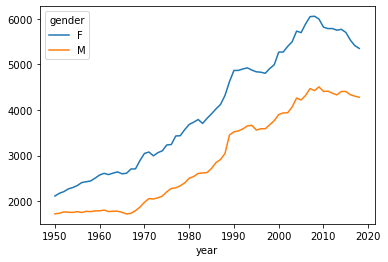

In [12]:
unique_names_per_gender.plot()

#plt.savefig('baby_names_before.png', dpi=200);